## Day 4 Homework -- Analysis in python

1. import plotnine as p9, scipy stats, pandas as pd, and numpy as np 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotnine as p9
from scipy import stats

You can get the "Iris" dataset <https://en.wikipedia.org/wiki/Iris_flower_data_set> from the `day3/data` directory. 
- Load it into pandas as we did the TB dataset previously. 
- Show the top 5 lines of the dataset.

In [2]:
raw=pd.read_csv("/home/timp/bcmb_bootcamp/day3/data/iris.csv")

In [15]:
raw[0:1]['sepal.length']

0    5.1
Name: sepal.length, dtype: float64

2. Plot the petal length of each species as a boxplot and a dotplot

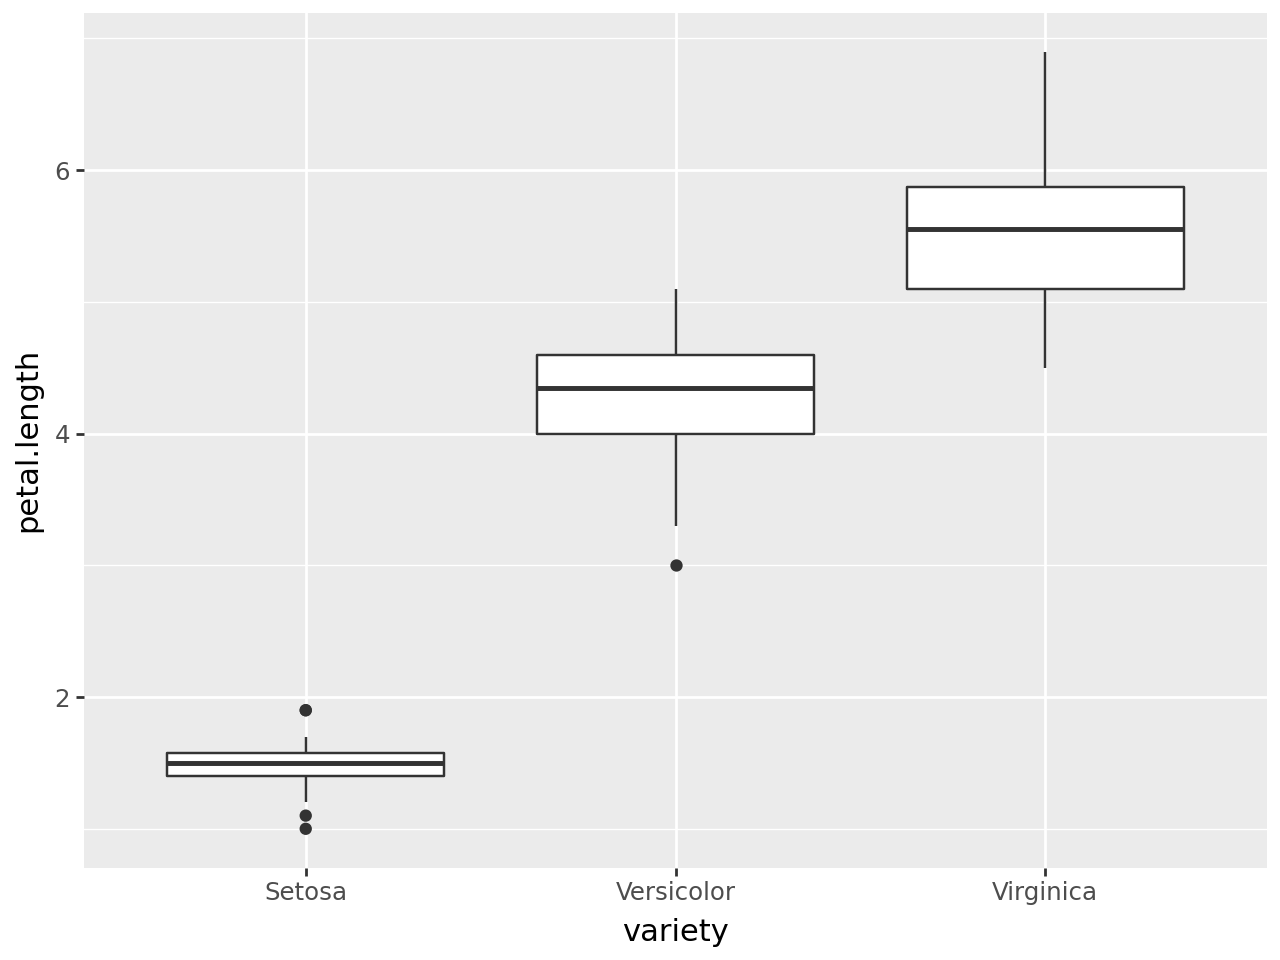

In [23]:
p9.ggplot(data=raw, mapping=p9.aes(y='petal.length', x='variety')) + p9.geom_boxplot()

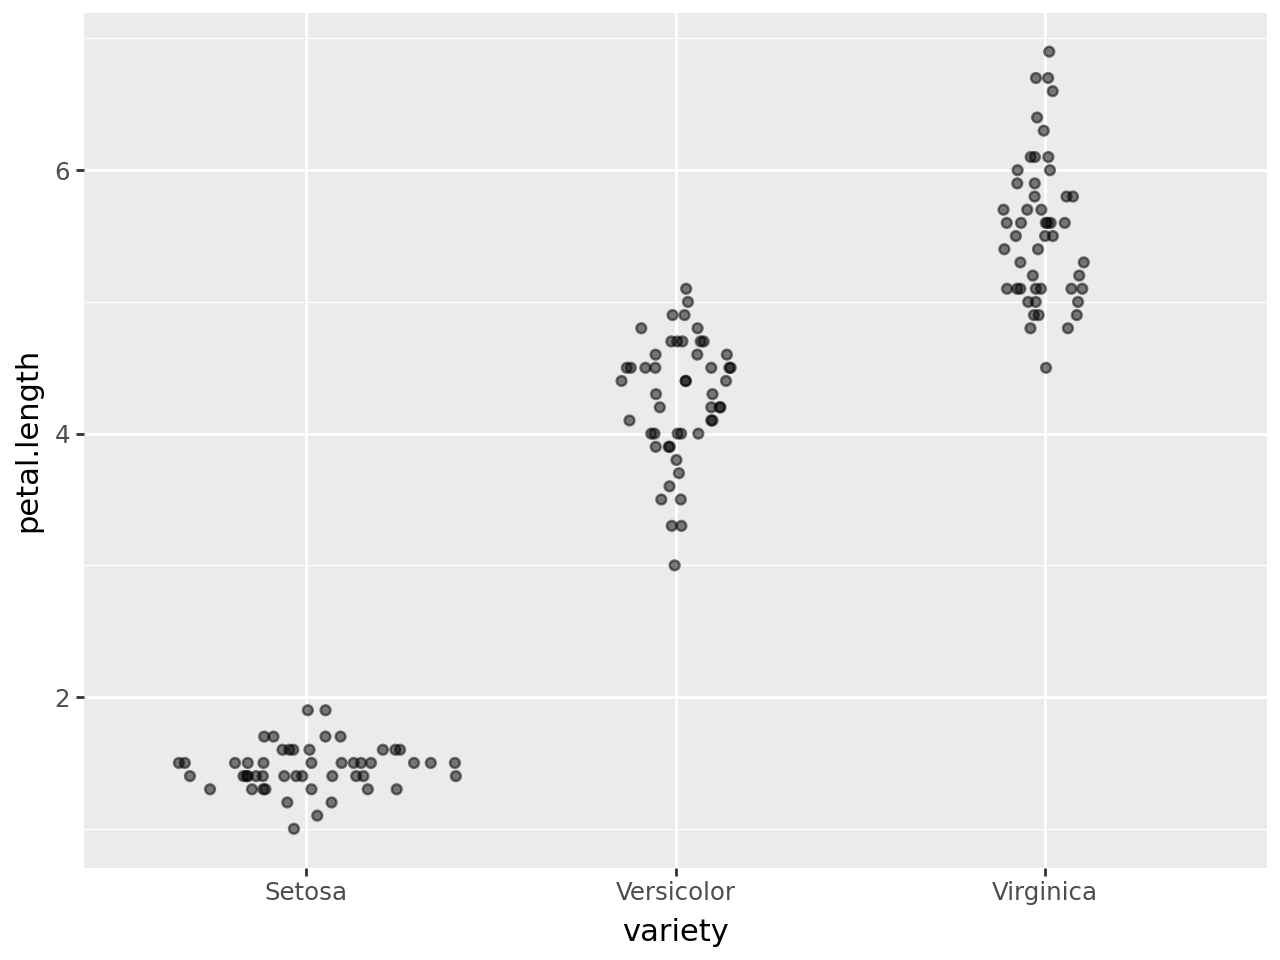

In [26]:
p9.ggplot(data=raw, mapping=p9.aes(y='petal.length', x='variety')) + p9.geom_sina(alpha=0.5)

3. Is there a statistically sigificant difference in petal length between setosa and versicolor, what about versicolor and virginica?

In [30]:
print(stats.ttest_ind(raw[raw['variety']=="Setosa"]["petal.length"], 
                      raw[raw['variety']=="Versicolor"]["petal.length"]))


TtestResult(statistic=np.float64(-39.492719391538095), pvalue=np.float64(5.404910513441677e-62), df=np.float64(98.0))


In [32]:
print(stats.ttest_ind(raw[raw['variety']=="Virginica"]["petal.length"], 
                      raw[raw['variety']=="Versicolor"]["petal.length"]))


TtestResult(statistic=np.float64(12.603779441384985), pvalue=np.float64(3.1788195478061495e-22), df=np.float64(98.0))


4. Generate all possible combinations of scatter plots (i.e. all variables versus each other) colored by variety.

In [47]:
varnames=list(raw.columns)
varnames=[col for col in raw.columns if col != 'variety']
varnames

varnames=['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
varnames

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [52]:
raw

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [56]:
def myplotter(dat, i,j):
    display(p9.ggplot(data=raw, mapping=p9.aes(x=i, y=j, color='variety')) + p9.geom_point()+p9.ggtitle("My plots"))

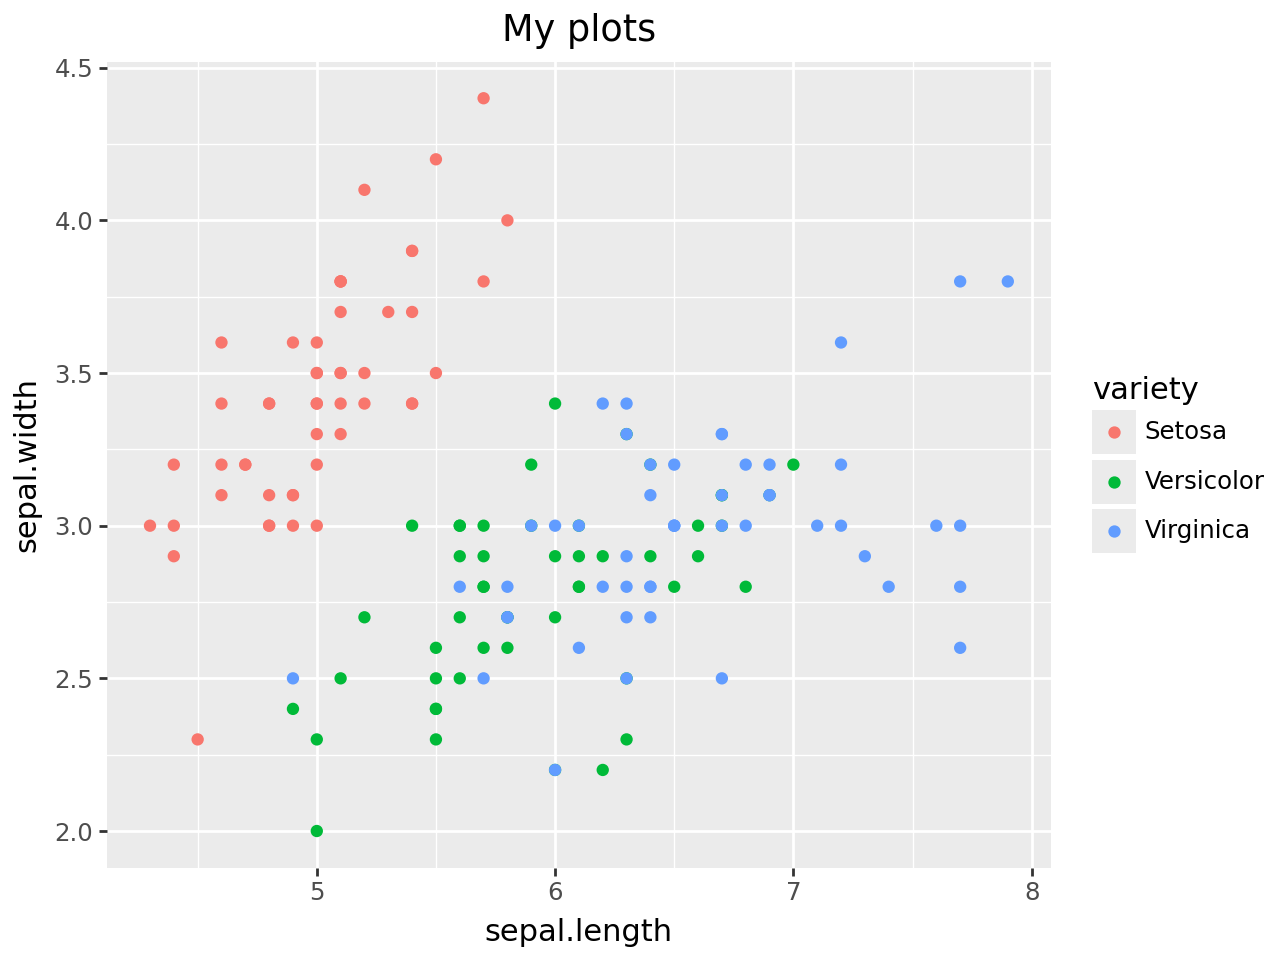

In [58]:
myplotter(raw, 'sepal.length', 'sepal.width')

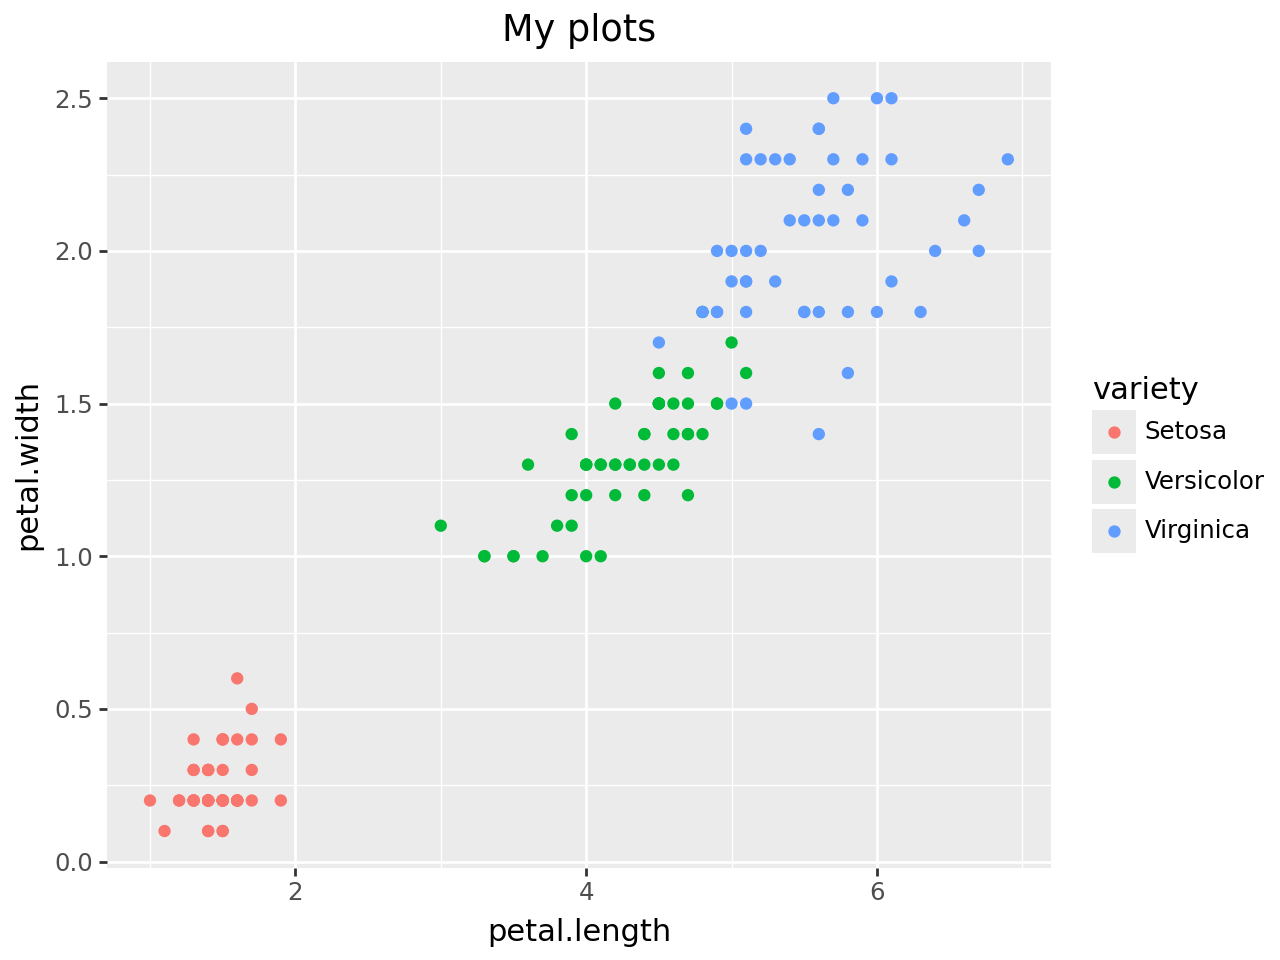

In [ ]:
myplotter(raw, 'petal.length', 'petal.width')

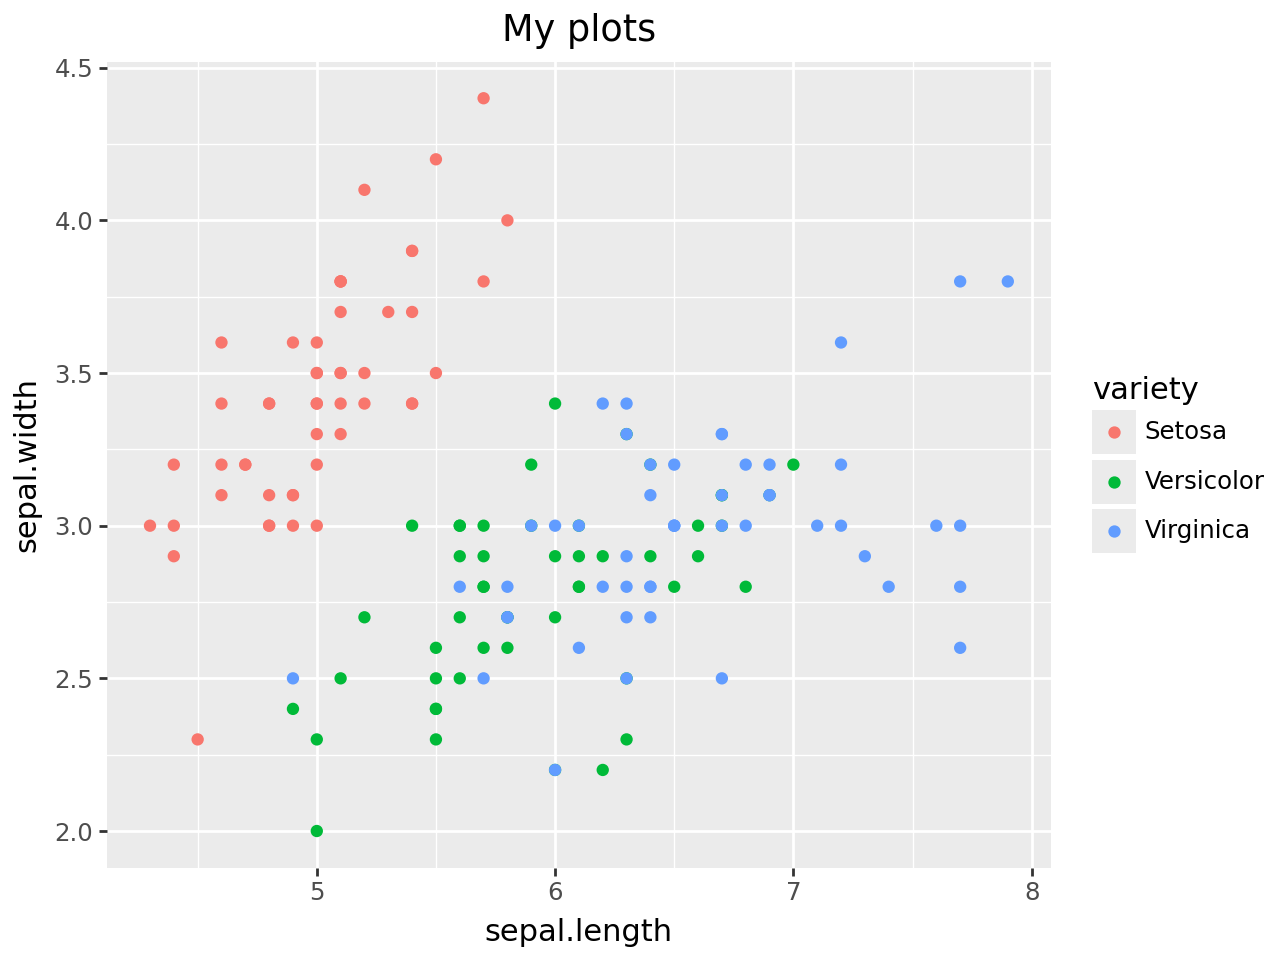

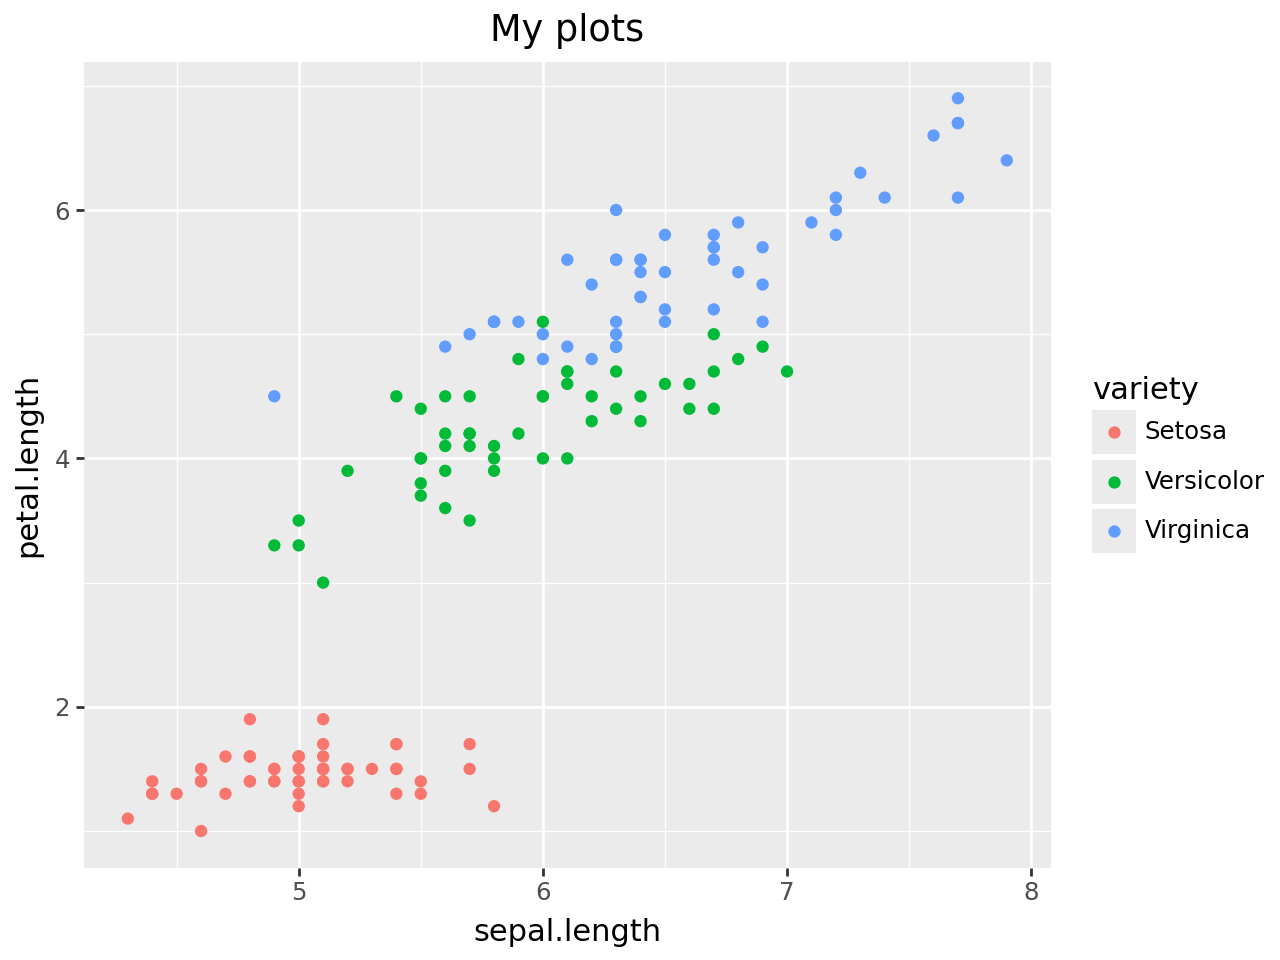

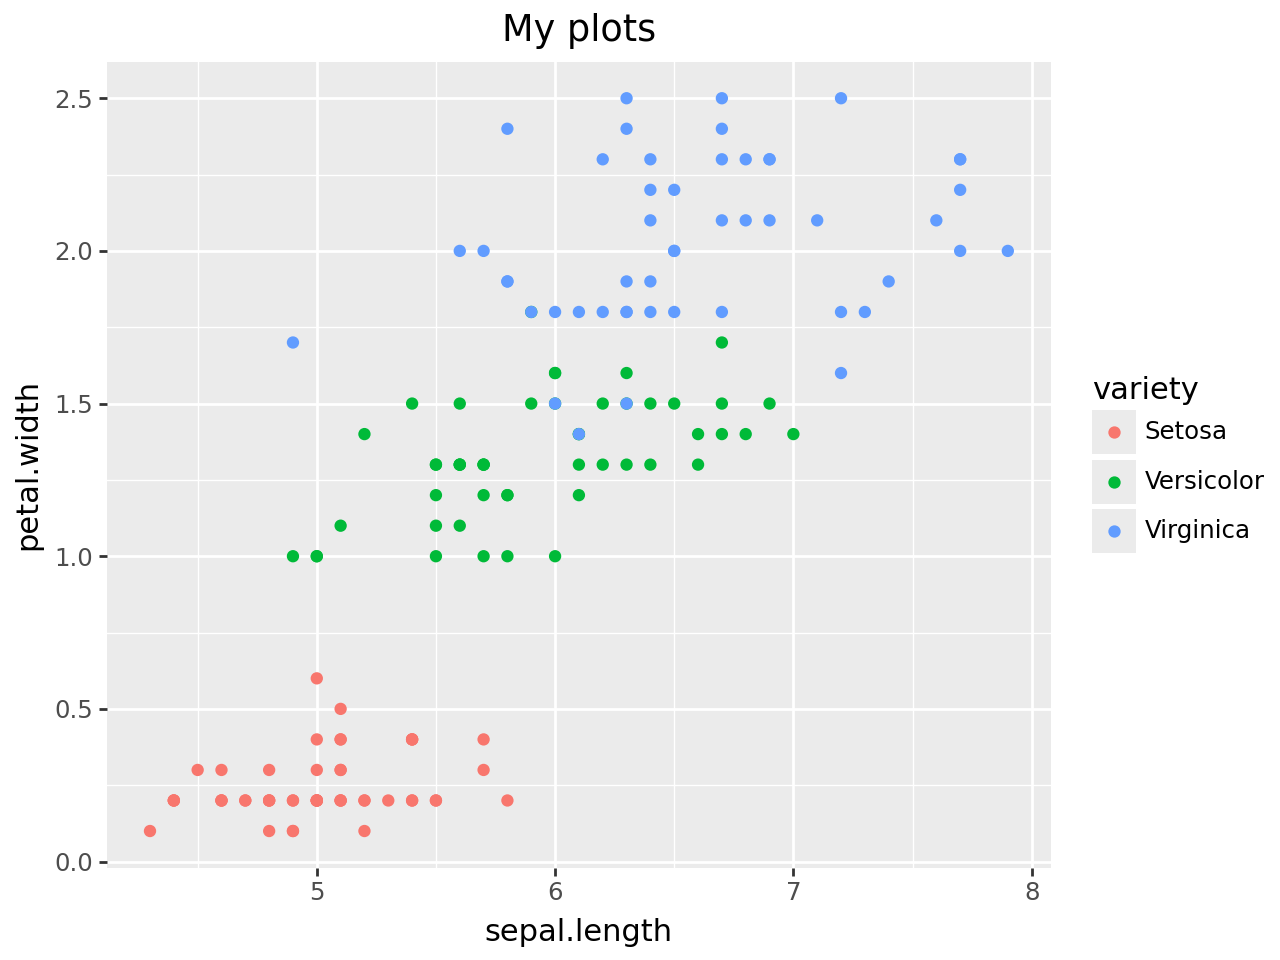

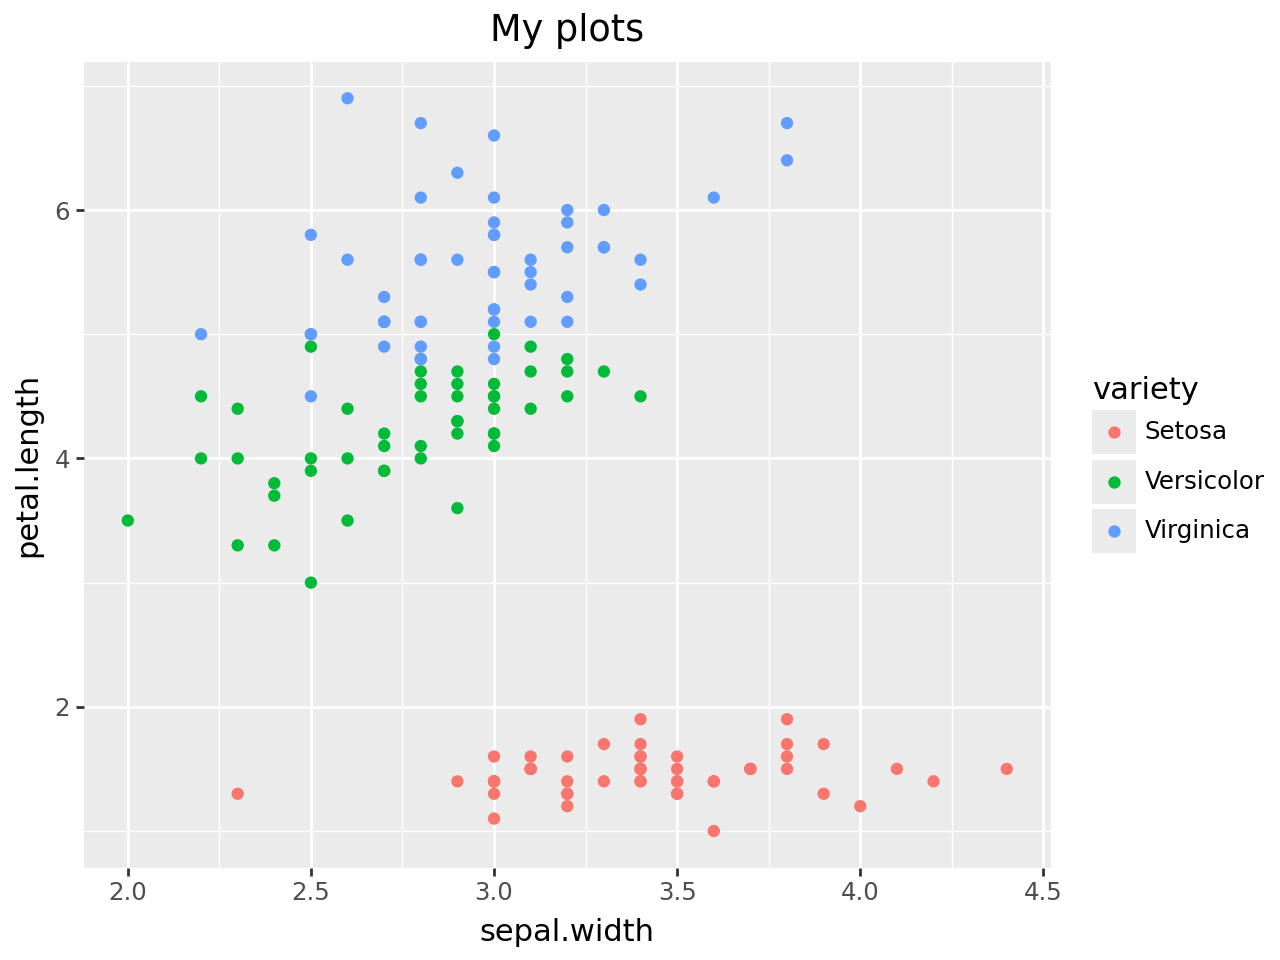

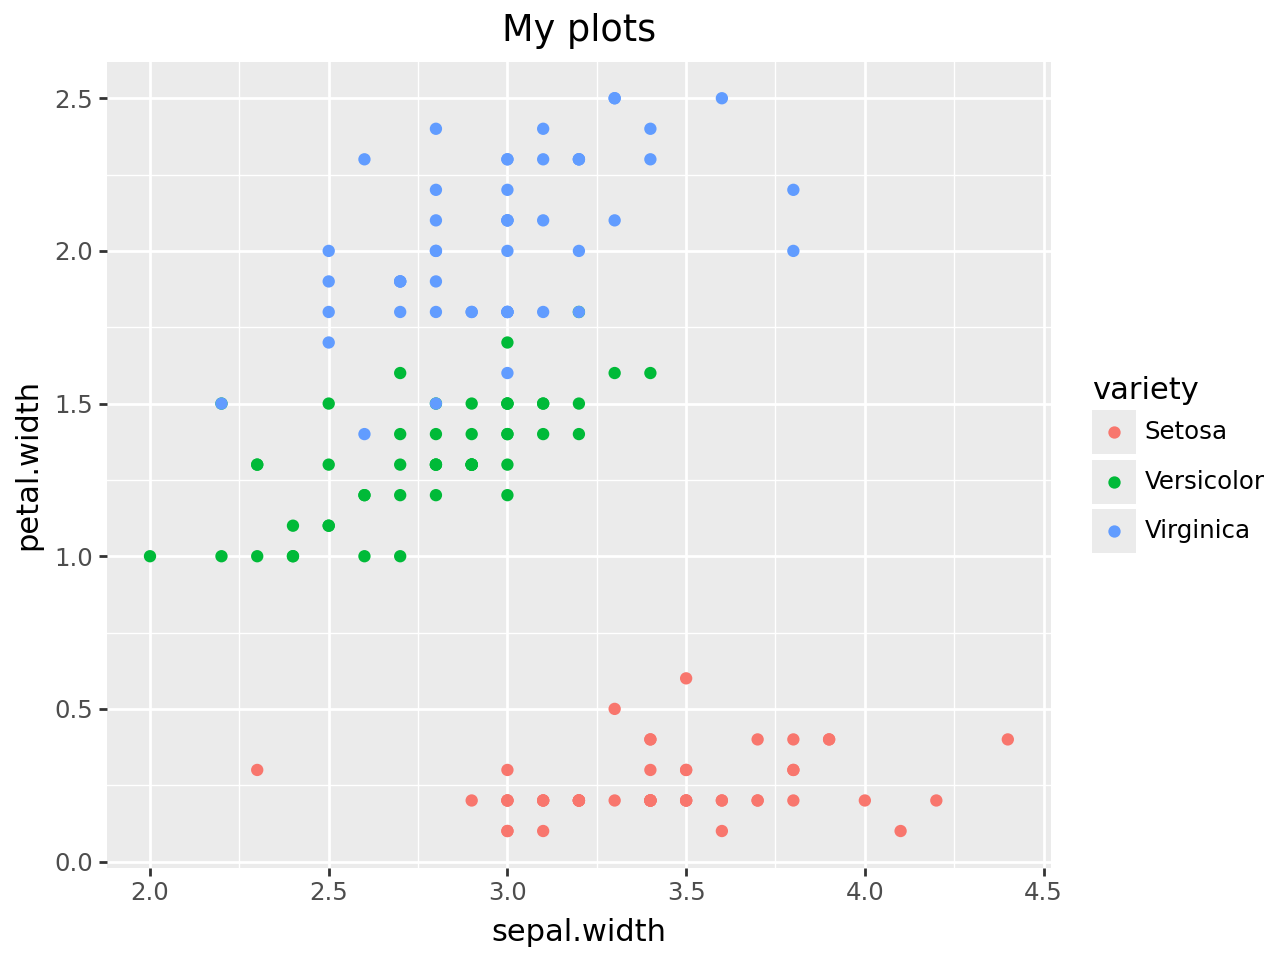

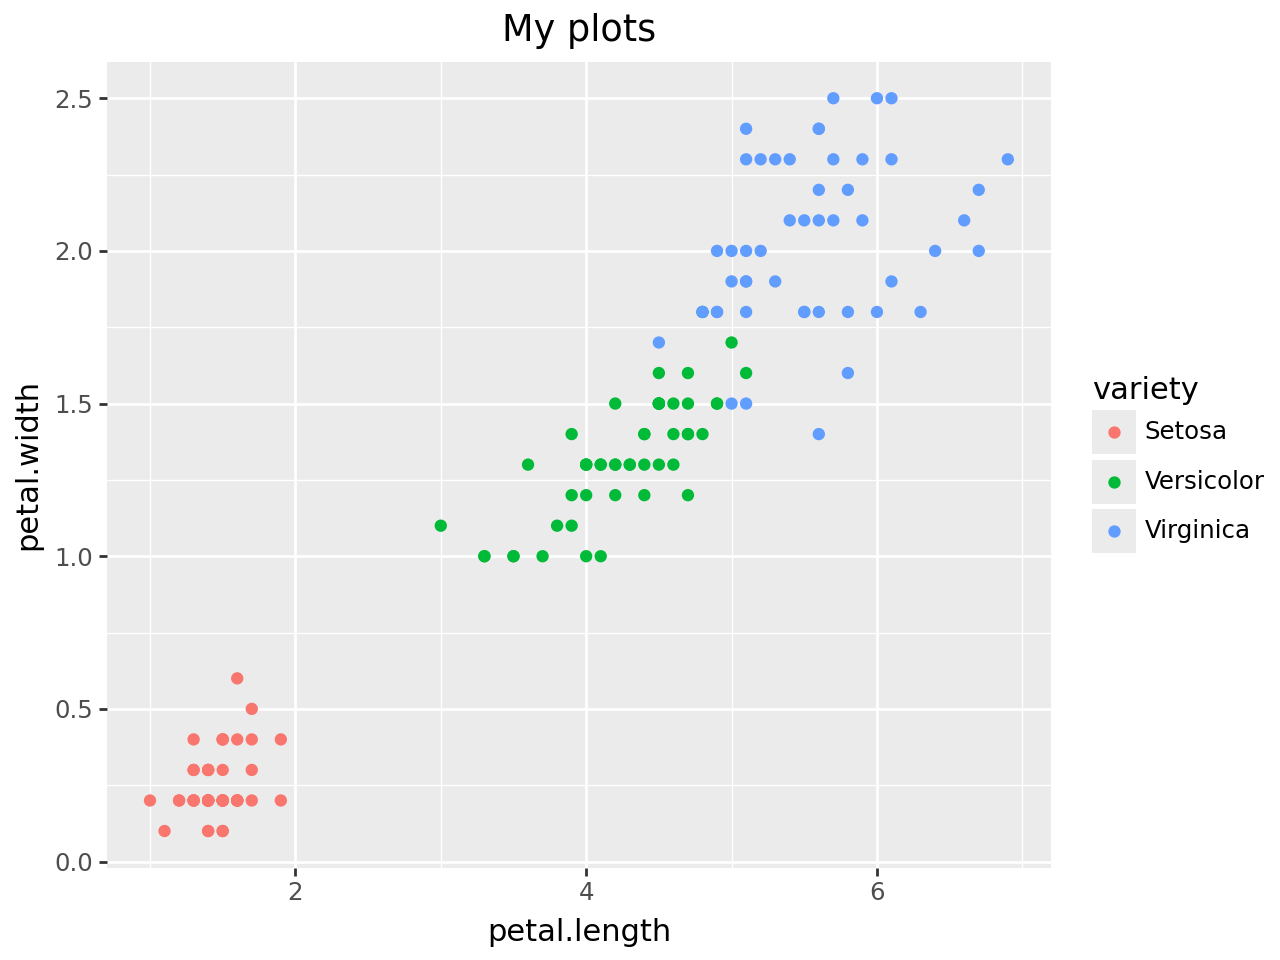

In [55]:

for i in range(0,4):
    for j in range(i+1,4):
        display(p9.ggplot(data=raw, mapping=p9.aes(x=varnames[i], y=varnames[j], color='variety')) + p9.geom_point()+p9.ggtitle("My plots"))

5. Write a for loop to test if each flower measurement is a normal distribution. If the distribution is normal print the p-value, if the distribution is not normal print "Distribution not normal!" (hint scipy has a normaltest function https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

In [60]:
stats.normaltest(raw['sepal.length'])

NormaltestResult(statistic=np.float64(5.735584236235733), pvalue=np.float64(0.05682424941067306))

In [78]:
for i in varnames:
    for j in raw['variety'].unique():
        print(i)
        print(j)
        myspec=raw[raw['variety']==j]
        print(stats.normaltest(myspec[i]))

sepal.length
Setosa
NormaltestResult(statistic=np.float64(0.19416346073876928), pvalue=np.float64(0.907481834276742))
sepal.length
Versicolor
NormaltestResult(statistic=np.float64(0.8414453635098835), pvalue=np.float64(0.6565721556024755))
sepal.length
Virginica
NormaltestResult(statistic=np.float64(0.2088992077265522), pvalue=np.float64(0.9008201941206306))
sepal.width
Setosa
NormaltestResult(statistic=np.float64(1.9657056293116515), pvalue=np.float64(0.37424193164116826))
sepal.width
Versicolor
NormaltestResult(statistic=np.float64(1.4509659409270497), pvalue=np.float64(0.48409071097159273))
sepal.width
Virginica
NormaltestResult(statistic=np.float64(2.5668475719027106), pvalue=np.float64(0.2770869880114645))
petal.length
Setosa
NormaltestResult(statistic=np.float64(2.236973547672174), pvalue=np.float64(0.32677390349997293))
petal.length
Versicolor
NormaltestResult(statistic=np.float64(3.3182862415011867), pvalue=np.float64(0.190301976072032))
petal.length
Virginica
NormaltestResult(

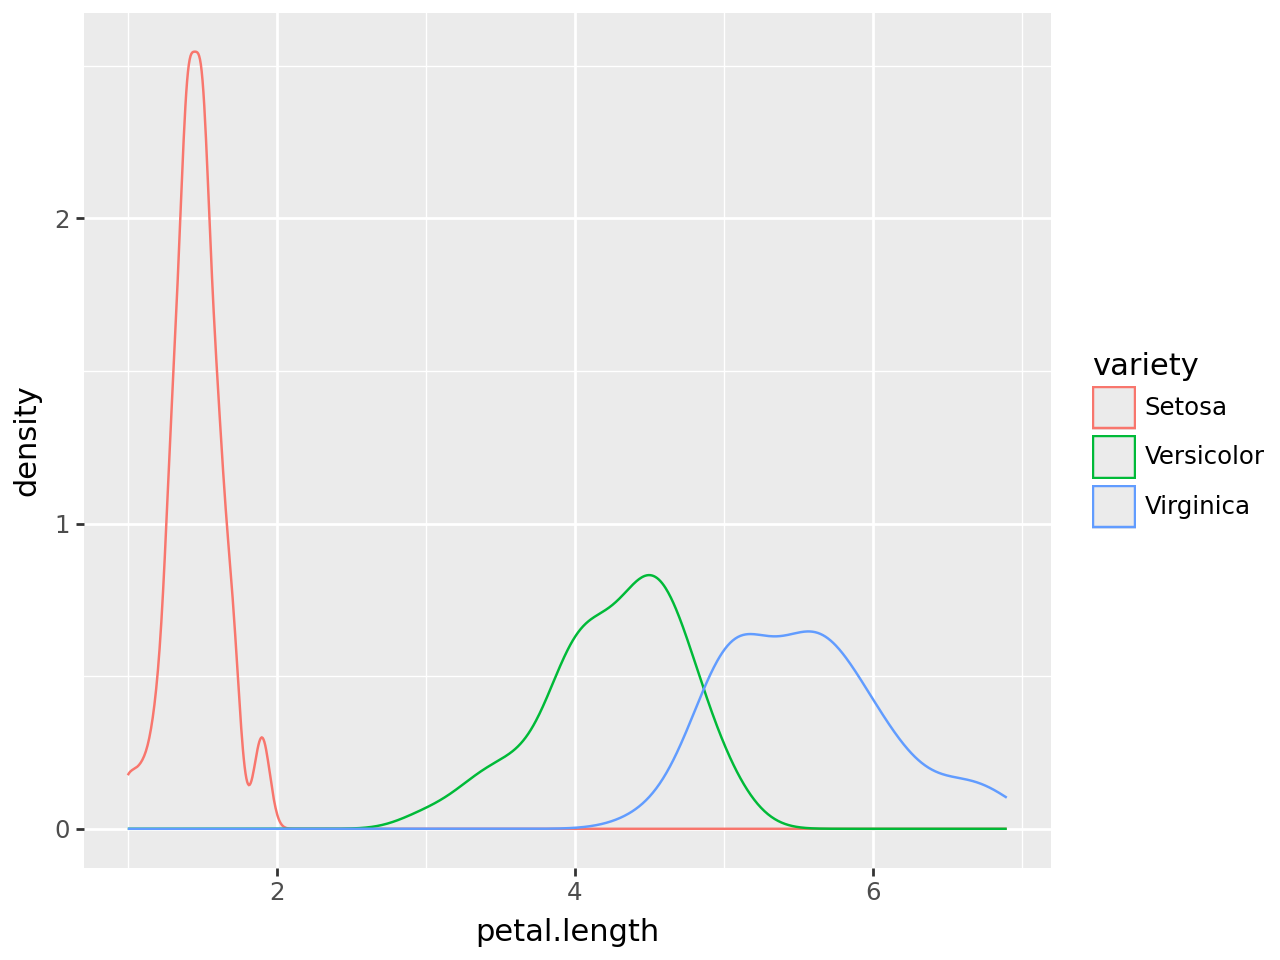

In [75]:
p9.ggplot(raw,p9.aes(x='petal.length', color='variety'))+p9.geom_density()

In [ ]:
for i in range(0,4):
    

6. Generate a correlation matrix between the iris variables, plot it as a heatmap with the axes labelled (Hint pandas has a correlation function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) Does the plot look different when you change the correlation method?

In [80]:
raw['petal.length'].corr(raw['petal.width'])

np.float64(0.9628654314027961)

In [84]:
for i in range(0,4):
    for j in range(i+1, 4):
        print(f"{varnames[i]} {varnames[j]}")
        print(raw[varnames[i]].corr(raw[varnames[j]]))

sepal.length sepal.width
-0.11756978413300208
sepal.length petal.length
0.8717537758865831
sepal.length petal.width
0.8179411262715757
sepal.width petal.length
-0.4284401043305394
sepal.width petal.width
-0.36612593253643927
petal.length petal.width
0.9628654314027961


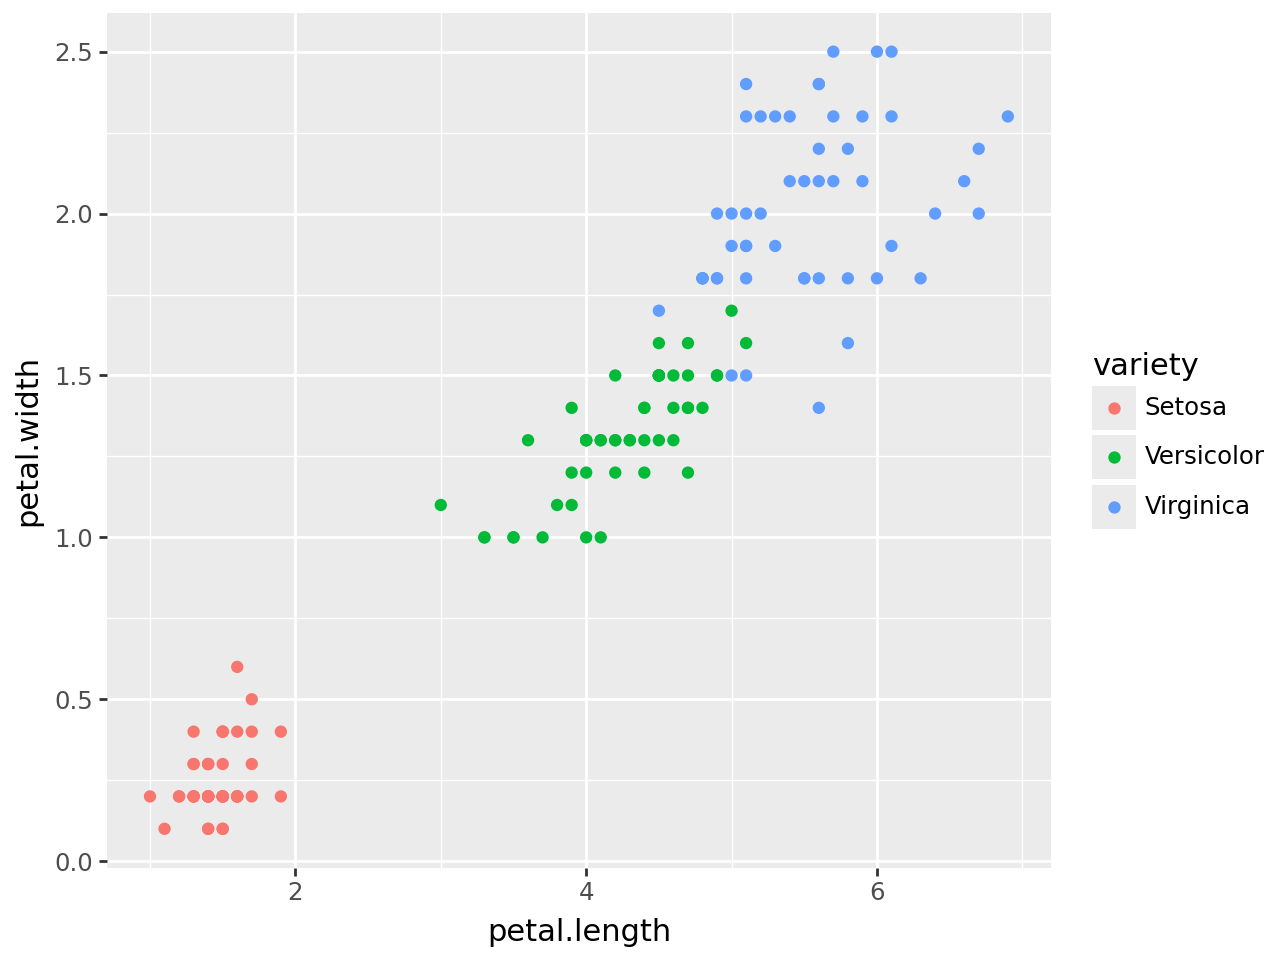

In [81]:
p9.ggplot(raw,p9.aes(x='petal.length',y='petal.width',color='variety'))+p9.geom_point()

7. Repeat 4, but with linear fits to each scatter plot.

In [ ]:
def linfun(x, m, b):
    return m * x + b

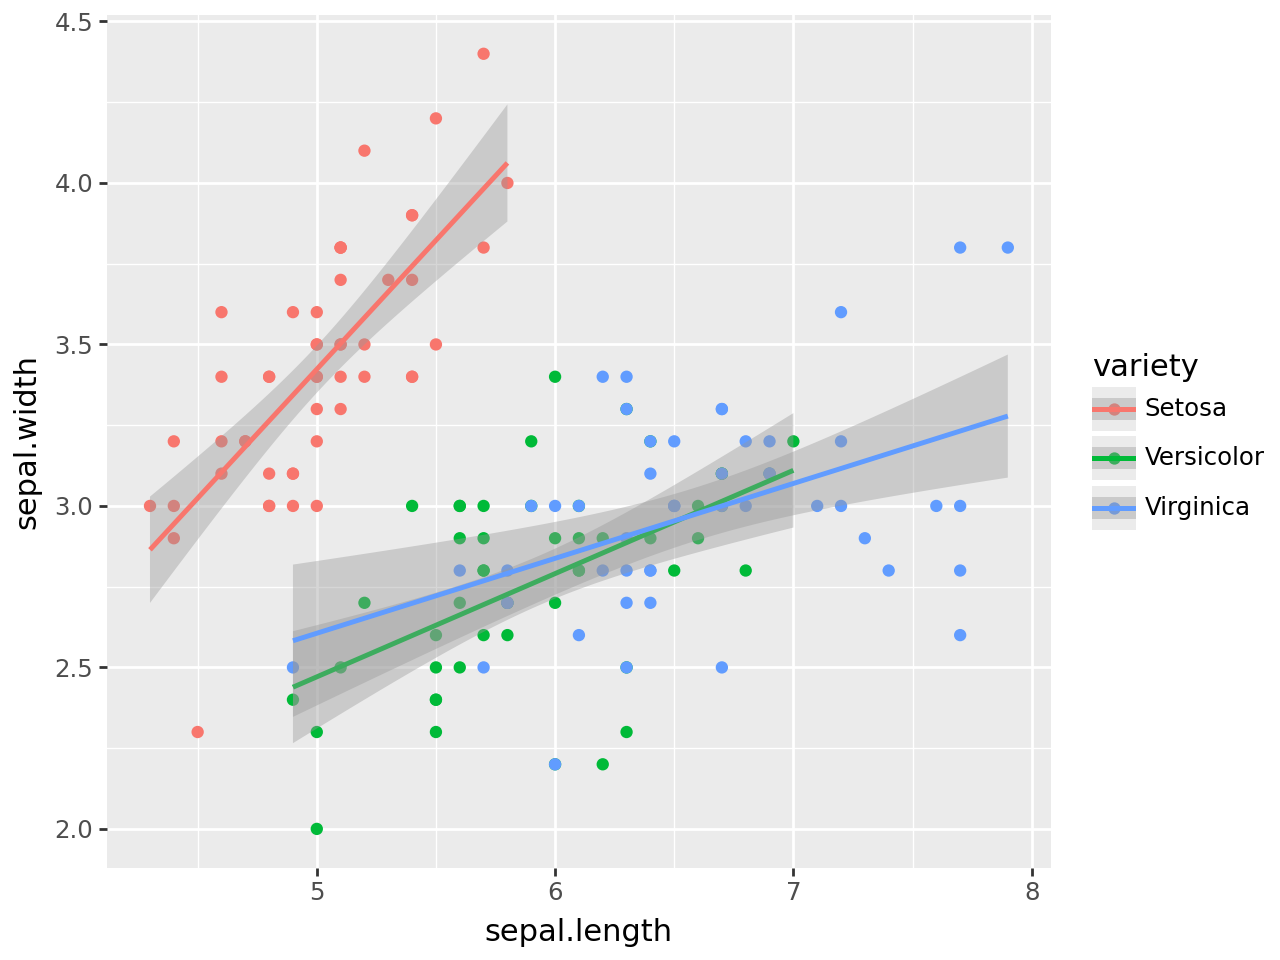

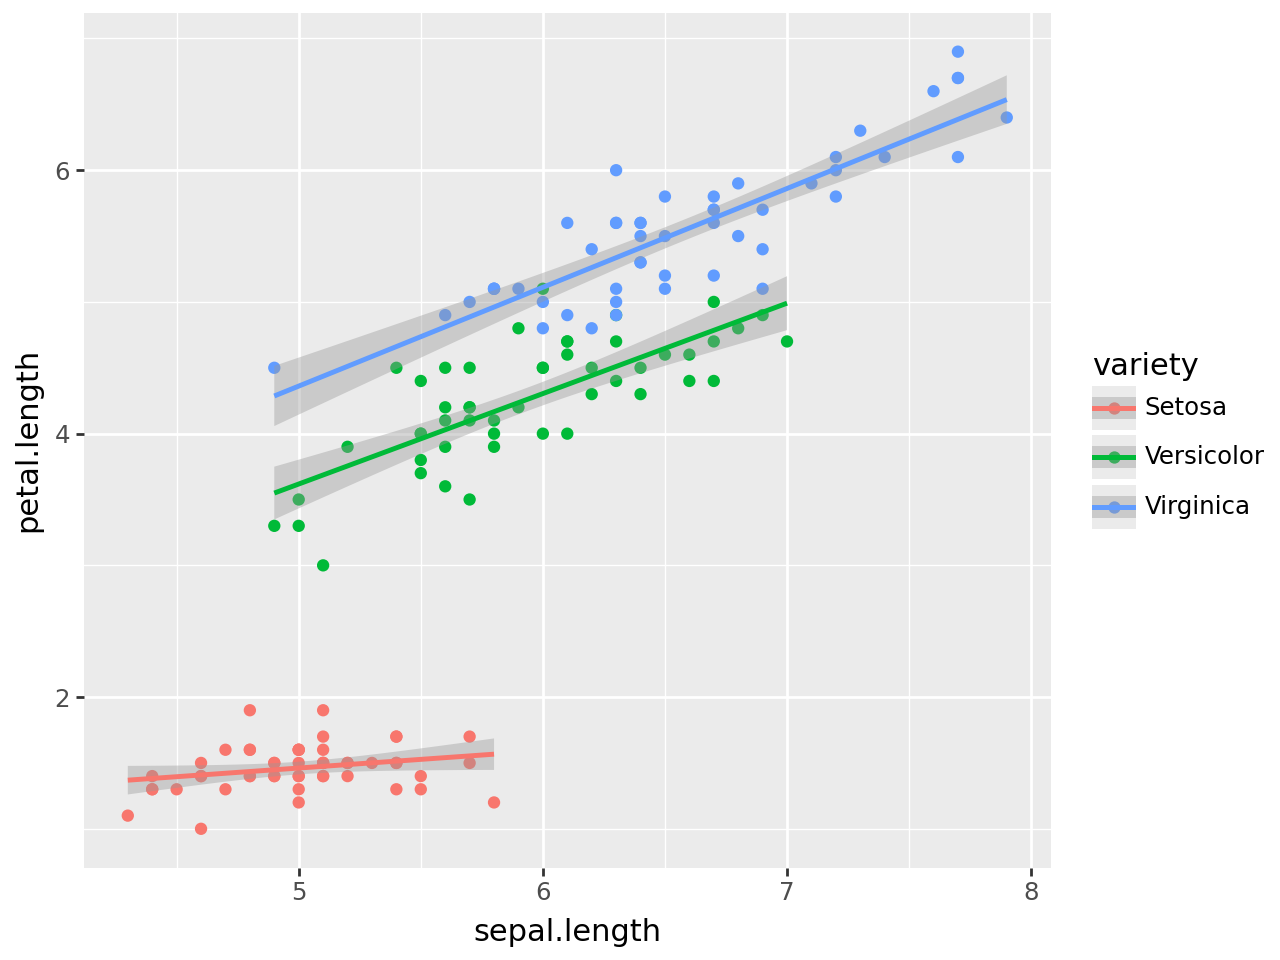

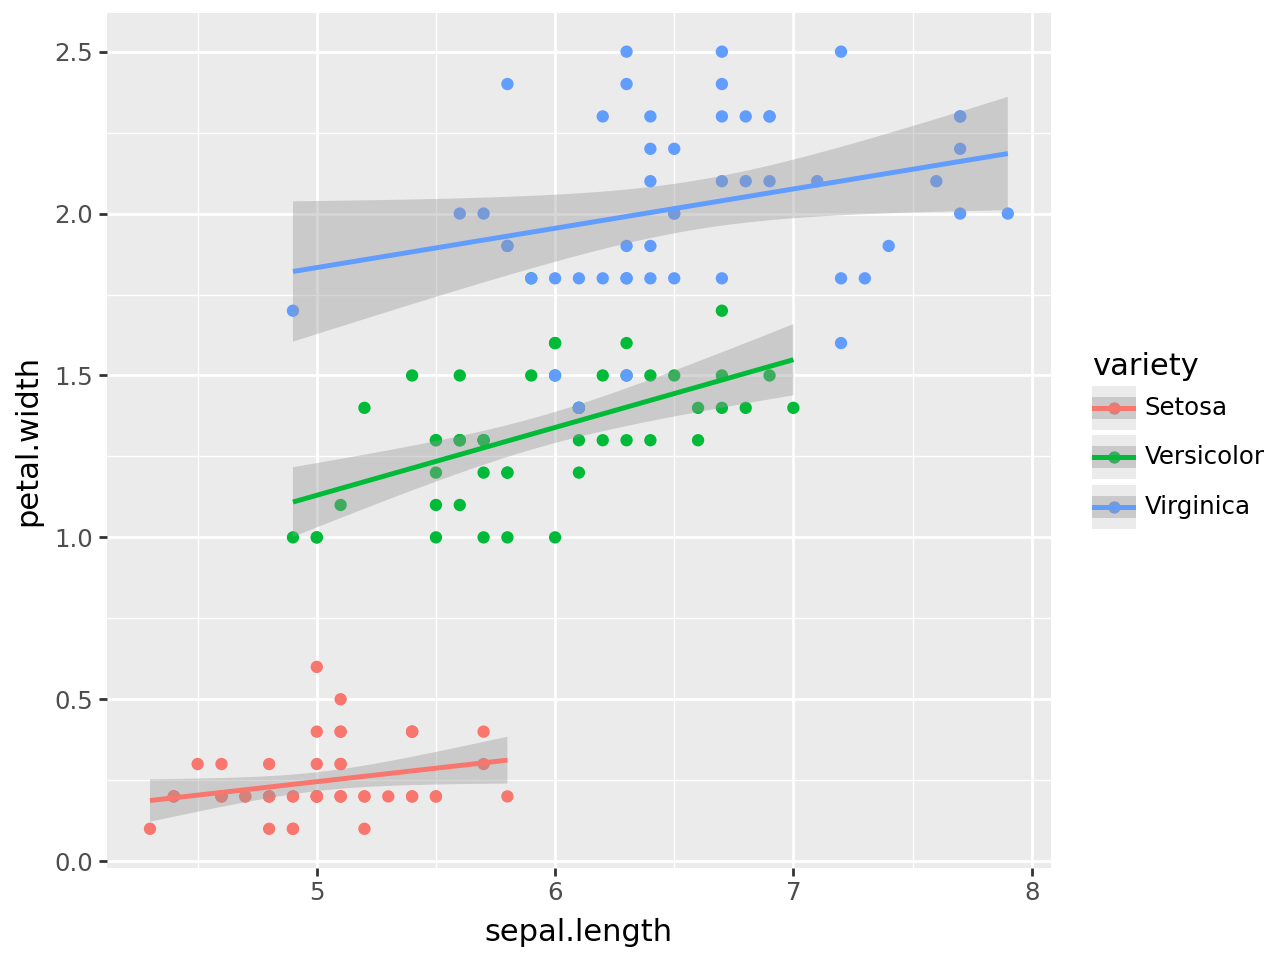

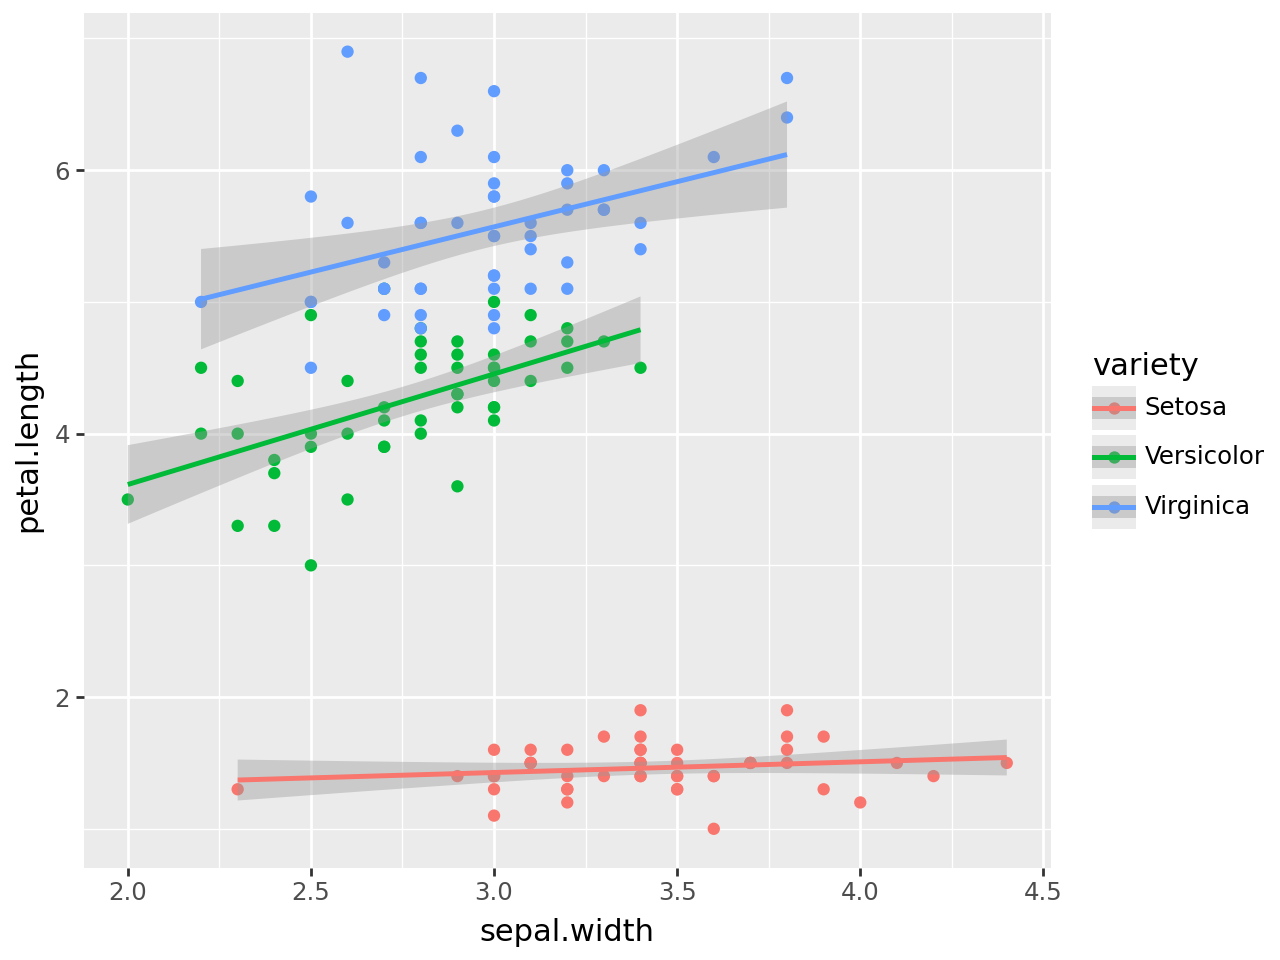

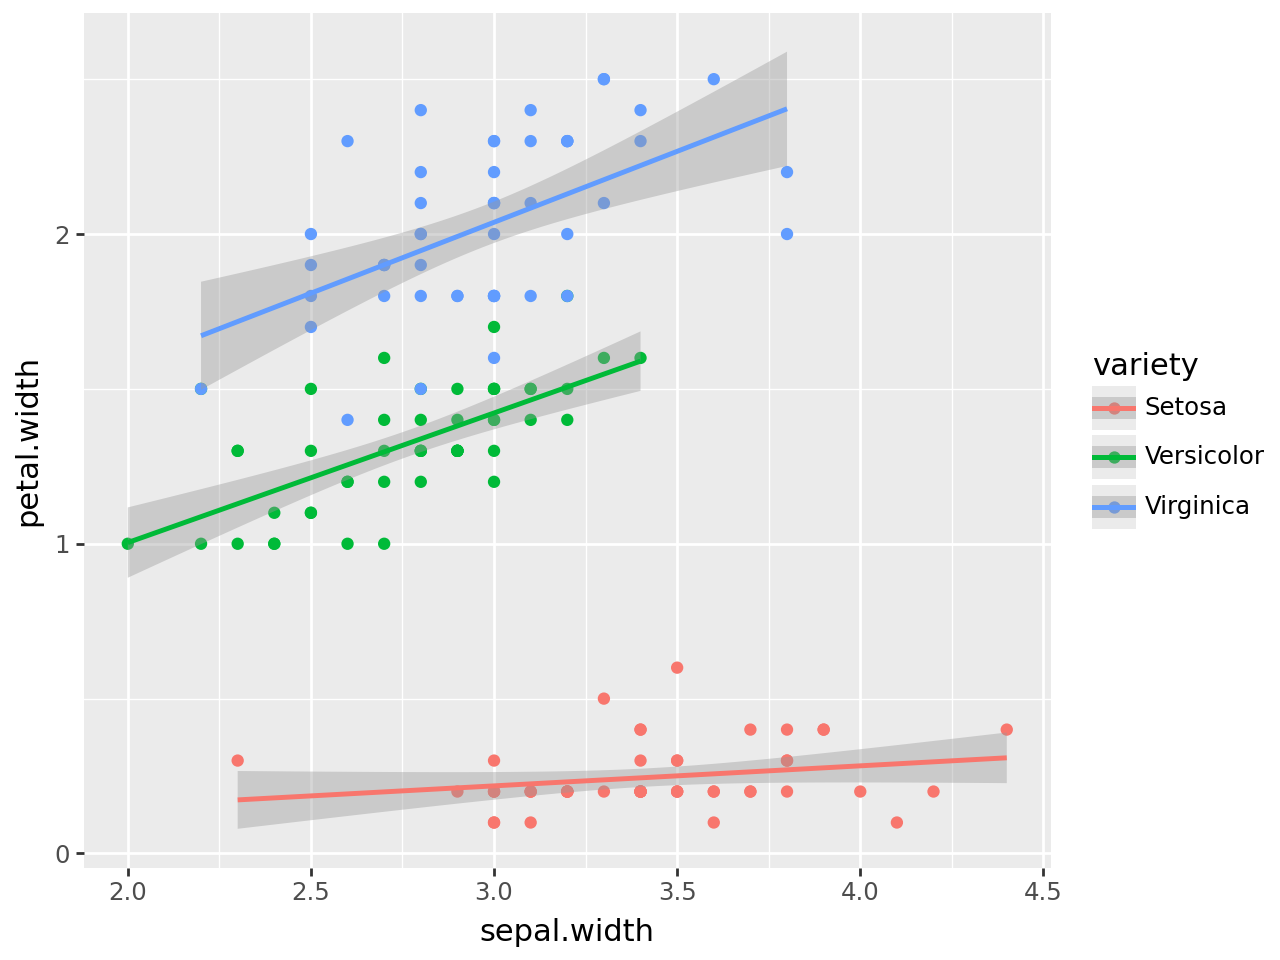

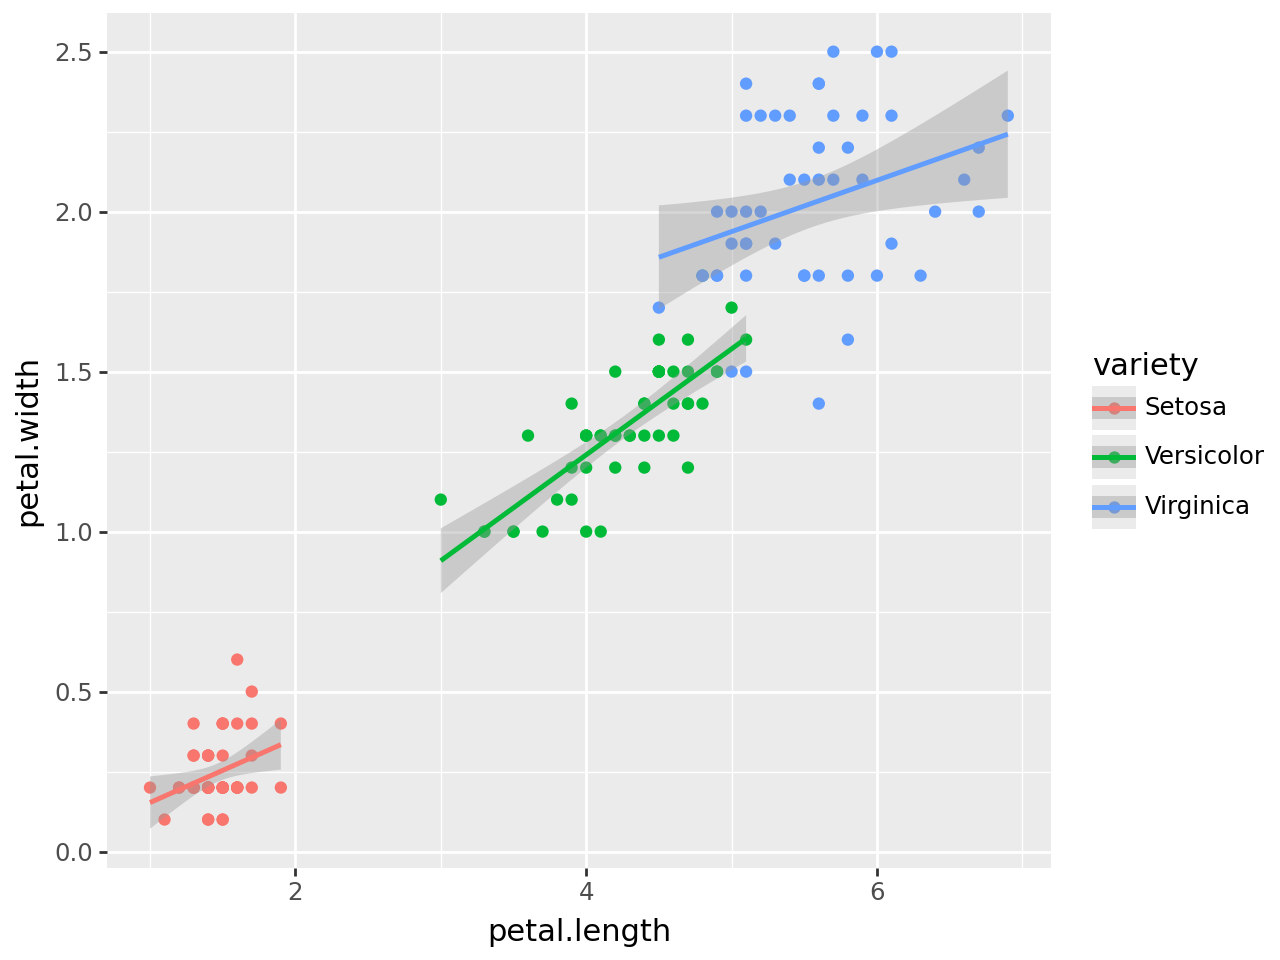

In [86]:

for i in range(0,4):
    for j in range(i+1,4):
        display(p9.ggplot(data=raw, mapping=p9.aes(x=varnames[i], y=varnames[j], color='variety')) + p9.geom_point()+p9.geom_smooth(method="lm"))